In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import os
import warnings

from operator import add

MEDIUM_SIZE = 10
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

%matplotlib inline
warnings.filterwarnings('ignore')

print(os.listdir())

['.ipynb_checkpoints', 'heart.csv', 'Untitled.ipynb', 'tree.dot', 'HeartDiseasePrediction.ipynb', 'heart-disease-prediction.ipynb', 'heart-diseases-analysis.ipynb']


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(f'Dataset contains {df.shape[0]} samples, {df.shape[1] - 1} independent features 1 target continuous variable.')

Dataset contains 303 samples, 13 independent features 1 target continuous variable.


In [4]:
print(df.info())
missing_values = (df.isnull().sum() / len(df)) * 100
print("\nFeatures with missing values: \n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Features with missing values: 
 Series([], dtype: float64)


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print(np.char.center(" Unique values of categorical variables ", 60, fillchar = "*"))
print("\nSex: ", df.sex.unique())
print("Cp: ", sorted(df.cp.unique()))
print("fbs: ", sorted(df.fbs.unique()))
print("cholestoral: ", sorted(df.chol.unique()))
print("restecg: ", sorted(df.restecg.unique()))
print("thalach: ", sorted(df.thalach.unique()))
print("exang: ", sorted(df.exang.unique()))
print("slope: ", sorted(df.slope.unique()))
print("ca: ", sorted(df.ca.unique()))
print("thal: ", sorted(df.thal.unique()))
print("target: ", sorted(df.target.unique()))

********** Unique values of categorical variables **********

Sex:  [1 0]
Cp:  [0, 1, 2, 3]
fbs:  [0, 1]
cholestoral:  [126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 278, 281, 282, 283, 284, 286, 288, 289, 290, 293, 294, 295, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 311, 313, 315, 318, 319, 321, 322, 325, 326, 327, 330, 335, 340, 341, 342, 353, 354, 360, 394, 407, 409, 417, 564]
restecg:  [0, 1, 2]
thalach:  [71, 88, 90, 95, 96, 97, 99, 103, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 1

In [7]:
print(np.char.center(" Unique values of categorical variables ", 60, fillchar = "*"))
print("\nSex: ", df.sex.unique())
print("Cp: ", sorted(df.cp.unique()))
print("fbs: ", sorted(df.fbs.unique()))
print("restecg: ", sorted(df.restecg.unique()))
print("exang: ", sorted(df.exang.unique()))
print("slope: ", sorted(df.slope.unique()))
print("ca: ", sorted(df.ca.unique()))
print("thal: ", sorted(df.thal.unique()))
print("target: ", sorted(df.target.unique()))

********** Unique values of categorical variables **********

Sex:  [1 0]
Cp:  [0, 1, 2, 3]
fbs:  [0, 1]
restecg:  [0, 1, 2]
exang:  [0, 1]
slope:  [0, 1, 2]
ca:  [0, 1, 2, 3, 4]
thal:  [0, 1, 2, 3]
target:  [0, 1]


In [8]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = df[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

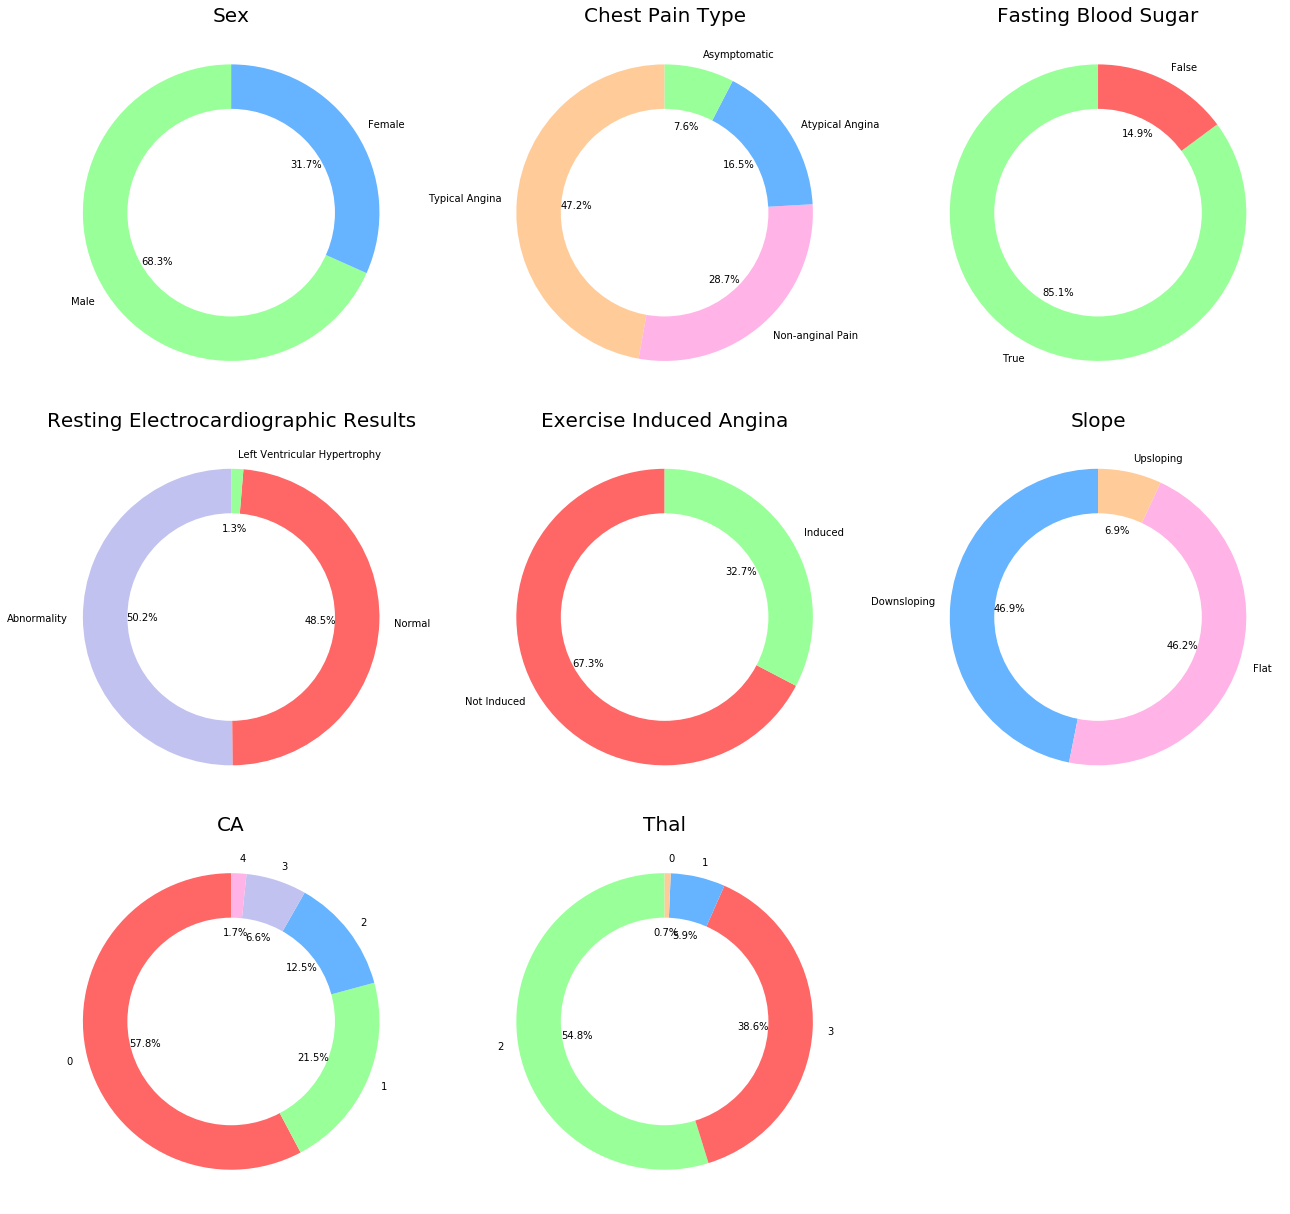

In [9]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(df, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(df, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(df, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
plt.show()

In [10]:
def create_percent_stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#019600', '#3C5F5A', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

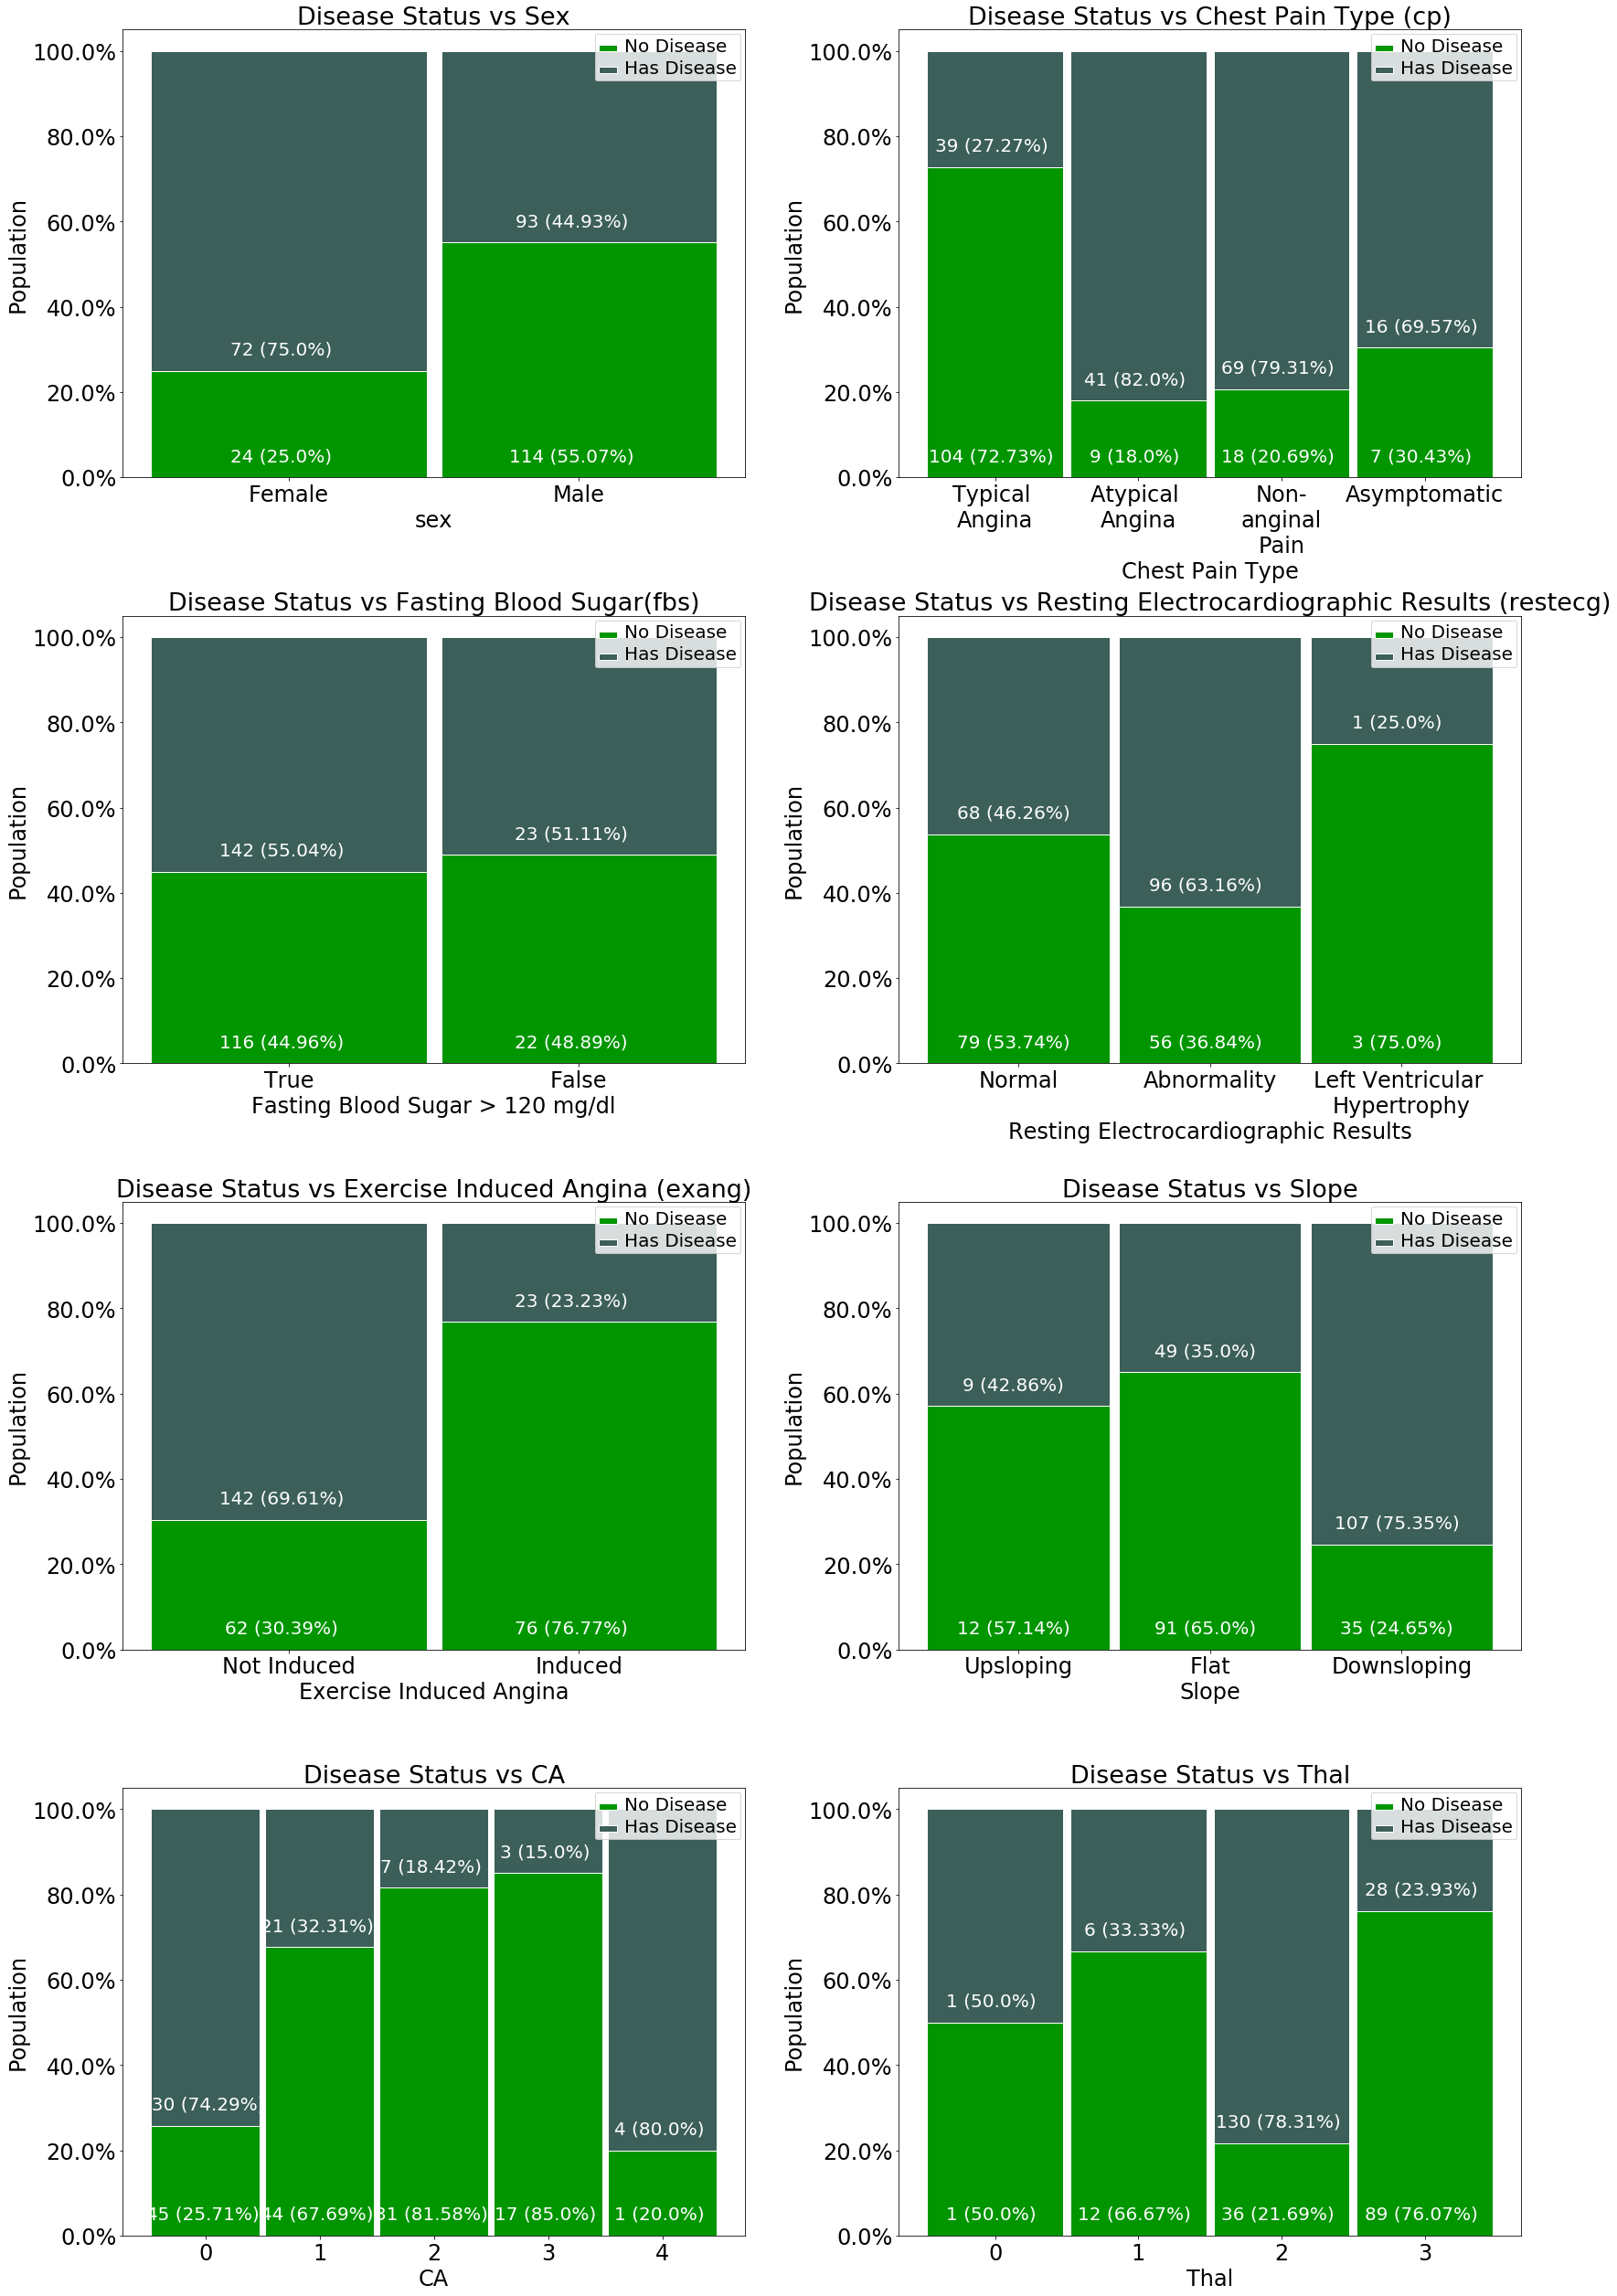

In [11]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 4
grid_cols = 2

# Draw Disease Status vs Sex chart
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Sex', ylabel = 'Population')

# Draw Disease Status vs Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['cp','target']].groupby(['cp','target']).size().unstack('target')
temp.rename(index={0:'Typical \nAngina', 1:'Atypical \nAngina', 2:'Non-\nanginal\nPain',3:'Asymptomatic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Chest Pain Type (cp)', ylabel = 'Population', xlabel = 'Chest Pain Type')

# Draw fbs - fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['fbs','target']].groupby(['fbs','target']).size().unstack('target')
temp.rename(index={0:'True', 1:'False'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Fasting Blood Sugar(fbs)', ylabel = 'Population', xlabel = 'Fasting Blood Sugar > 120 mg/dl')

# Draw restecg - resting electrocardiographic results chart
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['restecg','target']].groupby(['restecg','target']).size().unstack('target')
temp.rename(index={0:'Normal', 1:'Abnormality', 2:'Left Ventricular \nHypertrophy'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Resting Electrocardiographic Results (restecg)', ylabel = 'Population', xlabel = 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina chart
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['exang','target']].groupby(['exang','target']).size().unstack('target')
temp.rename(index={0:'Not Induced', 1:'Induced'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Exercise Induced Angina (exang)', ylabel = 'Population', xlabel = 'Exercise Induced Angina')

# Draw slope - the slope of the peak exercise ST segment chart
plt.subplot(grid_rows, grid_cols, 6)
temp = df[['slope','target']].groupby(['slope','target']).size().unstack('target')
temp.rename(index={0:'Upsloping', 1:'Flat', 2:'Downsloping'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Slope', ylabel = 'Population', xlabel = 'Slope')

# Draw ca - number of major vessels (0-3) colored by flourosopy chart
plt.subplot(grid_rows, grid_cols, 7)
temp = df[['ca','target']].groupby(['ca','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs CA', ylabel = 'Population', xlabel = 'CA')

# Draw thal chart
plt.subplot(grid_rows, grid_cols, 8)
temp = df[['thal','target']].groupby(['thal','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Thal', ylabel = 'Population', xlabel = 'Thal')
fig.tight_layout()
plt.show()

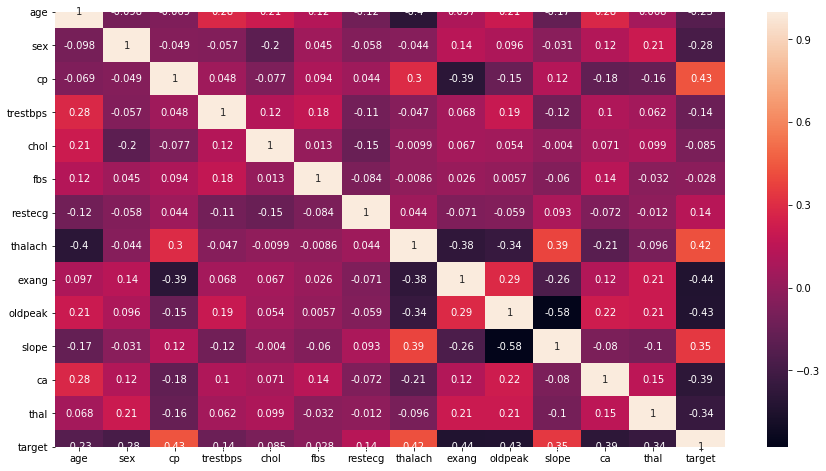

In [12]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(df.corr(), annot = True)
plt.show()

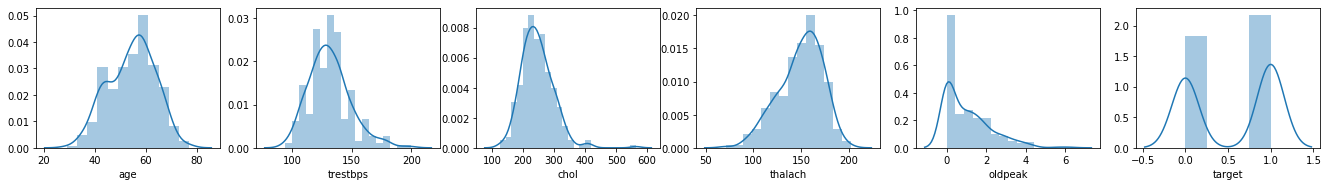

In [13]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_features)
number_of_rows = 5
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(df[f], kde=True)

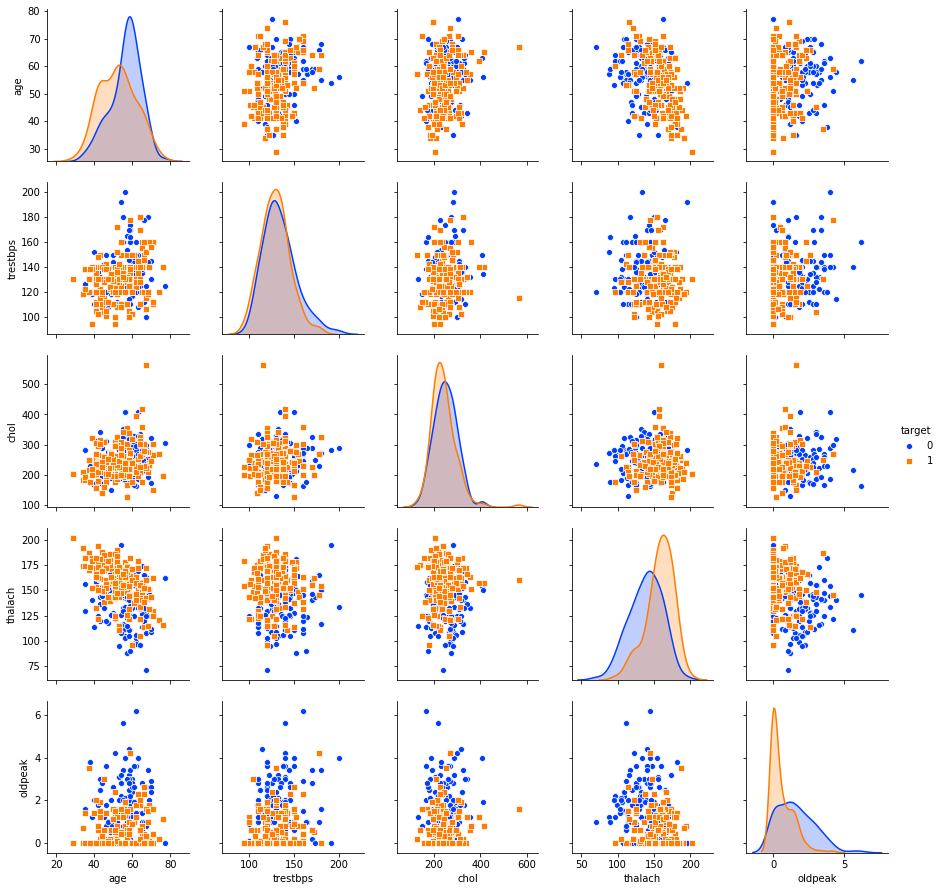

In [14]:
sns.pairplot(df, hue = 'target', markers=["o", "s"], vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], palette = sns.color_palette("bright", 10))

In [15]:
nominal_features = ['cp', 'slope', 'thal', 'restecg']
x = pd.get_dummies(df.drop(['target'], axis = 1), columns = nominal_features, drop_first=True).values
y = df.target.values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
print("Shape of X before Dimensionlity Reduction: ", x_train.shape)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

print("Shape of X after Dimensionlity Reduction: ", x_train.shape)

Shape of X before Dimensionlity Reduction:  (242, 19)
Shape of X after Dimensionlity Reduction:  (242, 1)


In [19]:
# SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)

# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train, y_train)
y_pred_knn = classifier_knn.predict(x_test)

#RandomForest
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
RF_model.fit(x_train, y_train)
#y_predict = model.predict(x_test)
#y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred_RF = RF_model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix

print("SVM Confusion Matrix")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
print()
print("Training Accuracy :", classifier.score(x_train, y_train))
print("Testing Accuracy :", classifier.score(x_test, y_test))
print()
print("KNN Confusion Matrix")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
print()
print("Training Accuracy :", classifier_knn.score(x_train, y_train))
print("Testing Accuracy :", classifier_knn.score(x_test, y_test))
print()
print("RandomForest Confusion Matrix")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
print()
print("Training Accuracy :", RF_model.score(x_train, y_train))
print("Testing Accuracy :", RF_model.score(x_test, y_test))


SVM Confusion Matrix
[[21  6]
 [ 3 31]]

Training Accuracy : 0.859504132231405
Testing Accuracy : 0.8524590163934426

KNN Confusion Matrix
[[22  5]
 [ 5 29]]

Training Accuracy : 0.8842975206611571
Testing Accuracy : 0.8360655737704918

RandomForest Confusion Matrix
[[22  5]
 [ 5 29]]

Training Accuracy : 0.9090909090909091
Testing Accuracy : 0.8524590163934426


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv = 10)
print("Support Vector Machine")
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print()
print("Random Forest")
scores = cross_val_score(RF_model, x_train, y_train, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print()

Support Vector Machine
Scores:  [0.76923077 0.875      0.875      0.83333333 0.95833333 0.83333333
 0.91666667 0.83333333 0.79166667 0.91666667]
Accuracy:  86.0 %

Random Forest
Scores:  [0.76923077 0.875      0.79166667 0.95833333 0.91666667 0.79166667
 0.83333333 0.91666667 0.70833333 0.95833333]
Accuracy:  85.0 %



In [22]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Score: ", best_accuracy)
print("Best Params: ", best_parameters)

Best Score:  0.859504132231405
Best Params:  {'C': 1, 'kernel': 'linear'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AUC: 0.914


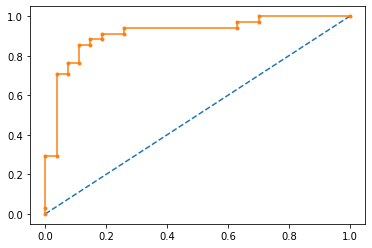

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 1, random_state = 0, probability = True)
classifier.fit(x_train, y_train)
probs = classifier.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


AUC: 0.898


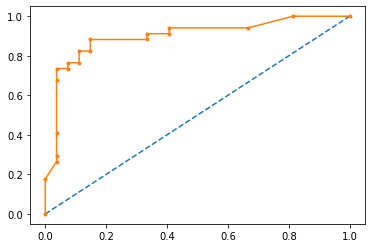

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

RF_model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
RF_model.fit(x_train, y_train)
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


In [25]:
#The best accuracy has been obtained as 91.4% From SVM